<a href="https://colab.research.google.com/github/Sumedhachak/-Tfod/blob/master/diabetes1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Diabetes Prediction Using Machine Learning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold


In [ ]:
# importing the necessary libraries
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

import missingno as msno
from sklearn.preprocessing import RobustScaler

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Loading the dataset
diabetes_data = pd.read_csv('/content/diabetes.csv')

#Print the first 5 rows of the dataframe.
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Basic EDA and statistical analysis

In [ ]:
!pip install dtale

In [ ]:
## gives information about the data types,columns, null value counts, memory usage etc

diabetes_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
!pip install flaml[notebook]

     |████████████████████████████████| 143 kB 11.0 MB/s 
     |████████████████████████████████| 2.0 MB 10.5 MB/s 
     |████████████████████████████████| 158 kB 49.8 MB/s 
     |████████████████████████████████| 757 kB 31.7 MB/s 
     |████████████████████████████████| 76.1 MB 56 kB/s 
  Created wheel for openml: filename=openml-0.10.2-py3-none-any.whl size=190318 sha256=3ddf9e0d7687b6cf634294373d9ad8d4883563ec1d31ec20d63c90f74180d8e5
  Stored in directory: /root/.cache/pip/wheels/9c/9e/f3/6a5ebf16527d7fe22d9bc1652bc9beb5dc9fcfdeb75e805400
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11732 sha256=4d867b5f82749c7436ed142b8000bb8a3370a313d61ee70471b7fd17dda3fc38
  Stored in directory: /root/.cache/pip/wheels/1f/0f/15/332ca86cbebf25ddf98518caaf887945fbe1712b97a0f2493b
Successfully built openml liac-arff
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 2.2.3
    Uninstalling lightgbm-2.2.3:
      Successfully uninstalled lightgbm

In [ ]:
 !pip install pandas-profiling[notebook,html]==2.7.1

In [ ]:
## basic statistic details about the data (note only numerical columns would be displayed here unless parameter include="all")

diabetes_data.describe()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### PROFILE REPORT

In [ ]:
from pandas_profiling import ProfileReport


In [ ]:
profile = ProfileReport(diabetes_data,  title="Pandas Profiling Report")
profile.to_notebook_iframe()

### The Question creeping out of this summary

#### Can minimum value of below listed columns be zero (0)?

On these columns, a value of zero does not make sense and thus indicates missing value.

Following columns or variables have an invalid zero value:
1. Glucose
2. BloodPressure
3. SkinThickness
4. Insulin
5. BMI

#### It is better to replace zeros with nan since after that counting them would be easier and zeros need to be replaced with suitable values

### FEATURE ENGINEERING

To fill these Nan values the data distribution needs to be understood

In [ ]:
diabetes_data_copy = diabetes_data.copy(deep = True) # creating the copy of the dataset
# replacing the 0 values with Nan
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(diabetes_data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


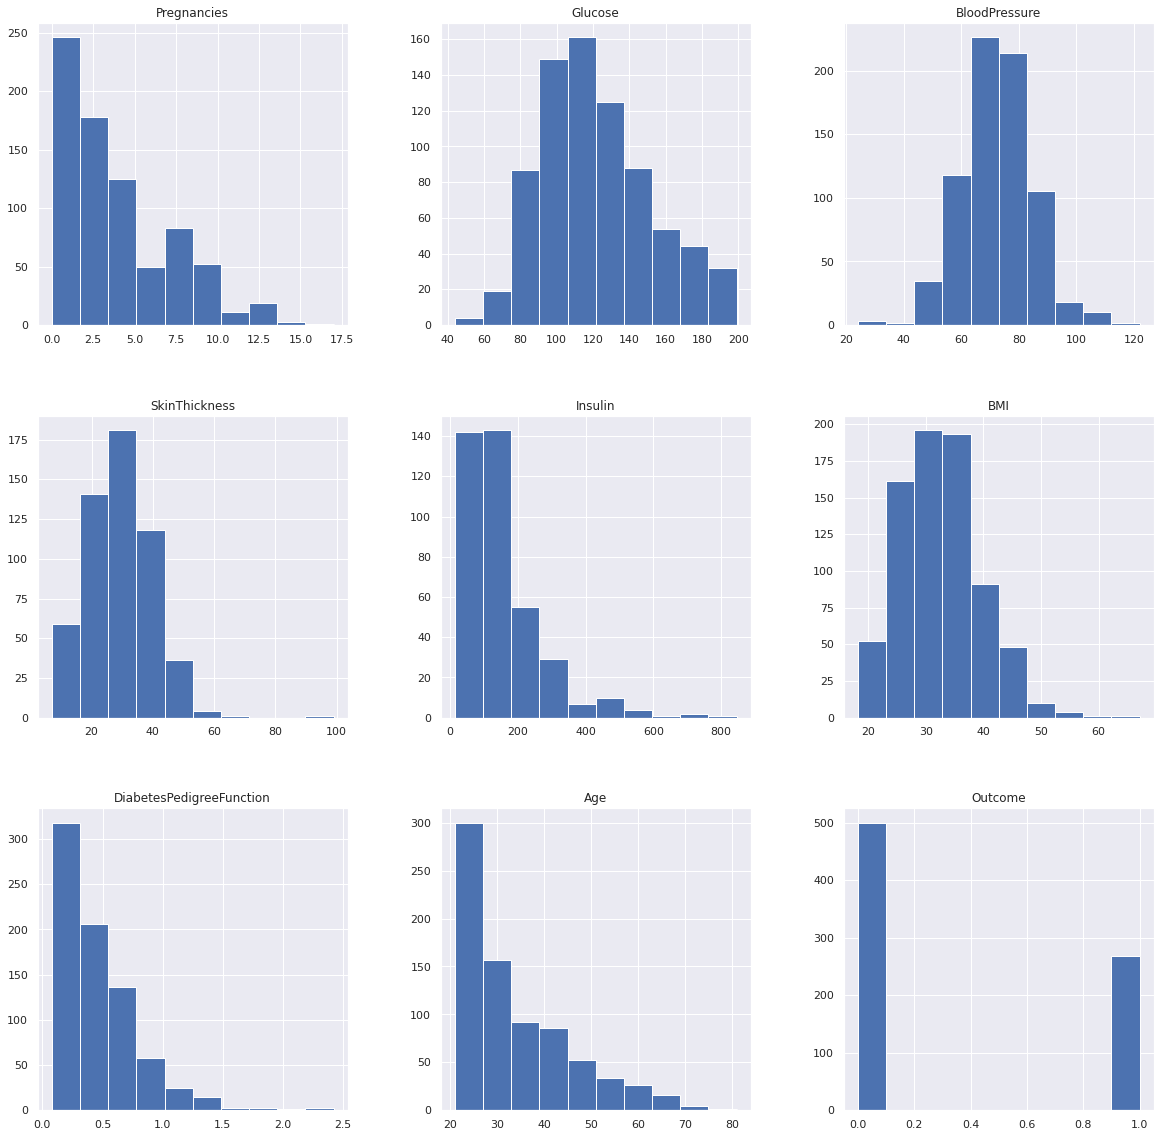

In [ ]:
p = diabetes_data_copy.hist(figsize = (20,20))

### Aiming to impute nan values for the columns in accordance with their distribution

### Aiming to impute nan values for the columns in accordance with their distribution

In [ ]:
diabetes_data['BMI'] = diabetes_data['BMI'].replace(0,diabetes_data_copy['BMI'].mean())
diabetes_data['BloodPressure'] = diabetes_data['BloodPressure'].replace(0,diabetes_data_copy['BMI'].mean())
diabetes_data['Insulin'] = diabetes_data['Insulin'].replace(0,diabetes_data_copy['BMI'].median())
diabetes_data['Glucose'] = diabetes_data['Glucose'].replace(0,diabetes_data_copy['BMI'].median())
diabetes_data['SkinThickness'] = diabetes_data['SkinThickness'].replace(0,diabetes_data_copy['BMI'].median())

## Plotting after Nan removal 

In [ ]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [ ]:
diabetes_data['Outcome'].value_counts()


0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
df_new['Outcome'].value_counts()

0    314
1    117
Name: Outcome, dtype: int64

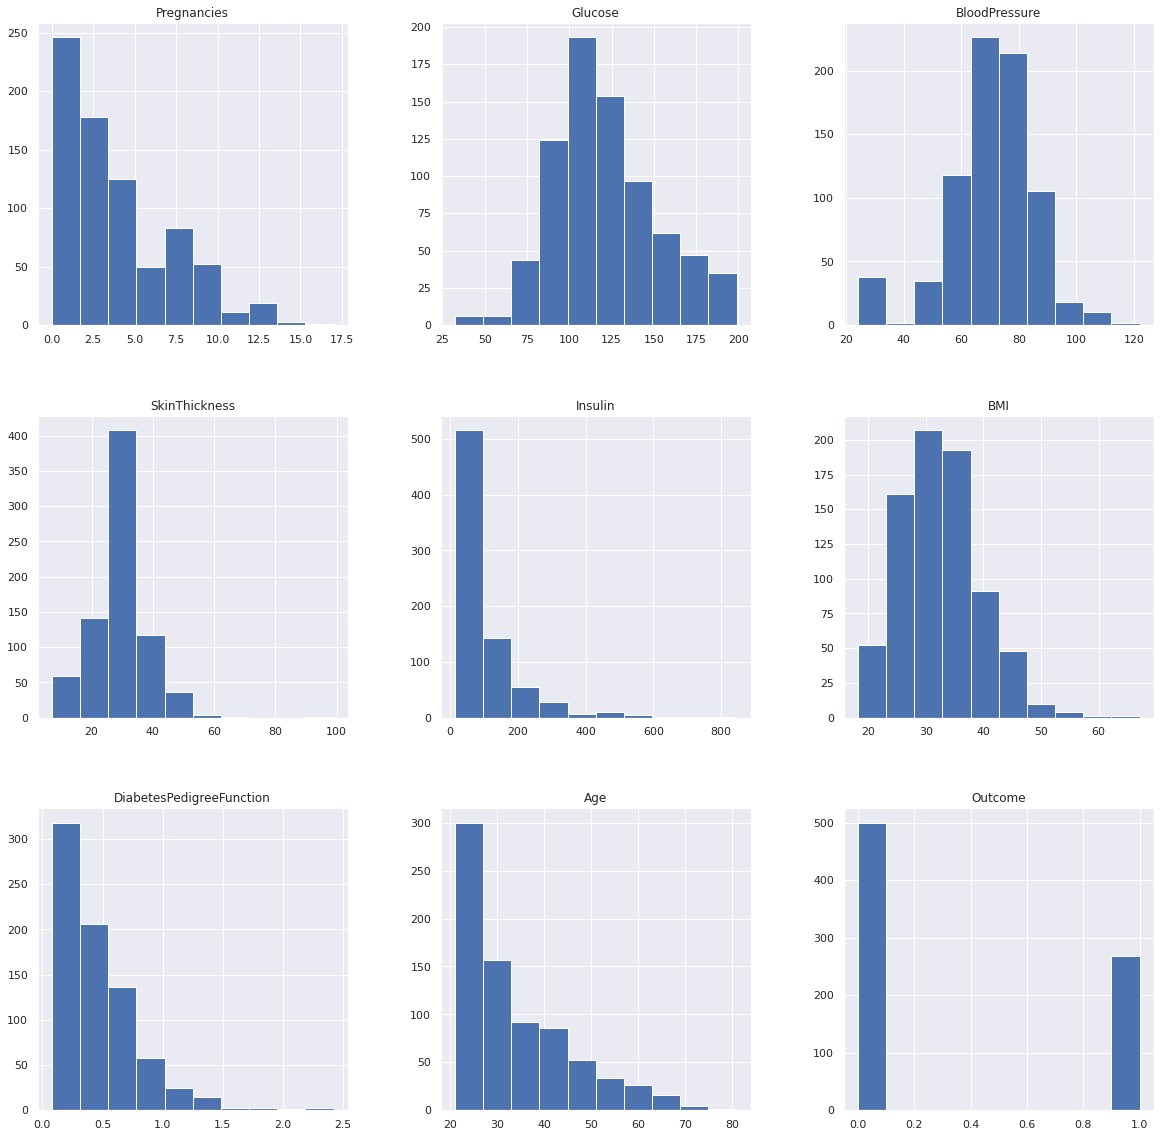

In [ ]:
p = diabetes_data.hist(figsize = (20,20))

## Plotting after Nan removal 

In [ ]:
diabetes_data.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,32.3,33.6,0.627,50,1
1,1,85.0,66.0,29.0,32.3,26.6,0.351,31,0
2,8,183.0,64.0,32.3,32.3,23.3,0.672,32,1


0    500
1    268
Name: Outcome, dtype: int64


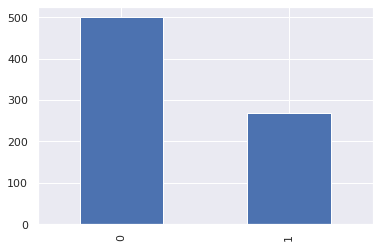

In [ ]:
## checking the balance of the data by plotting the count of outcomes by their value
color_wheel = {1: "#0392cf", 
               2: "#7bc043"}
colors = diabetes_data["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(diabetes_data.Outcome.value_counts())
p=diabetes_data.Outcome.value_counts().plot(kind="bar")


In [ ]:
# from pands.plotthing import scatter_matrix
#p= scatter_matrix(df, figsixe=(37,37))

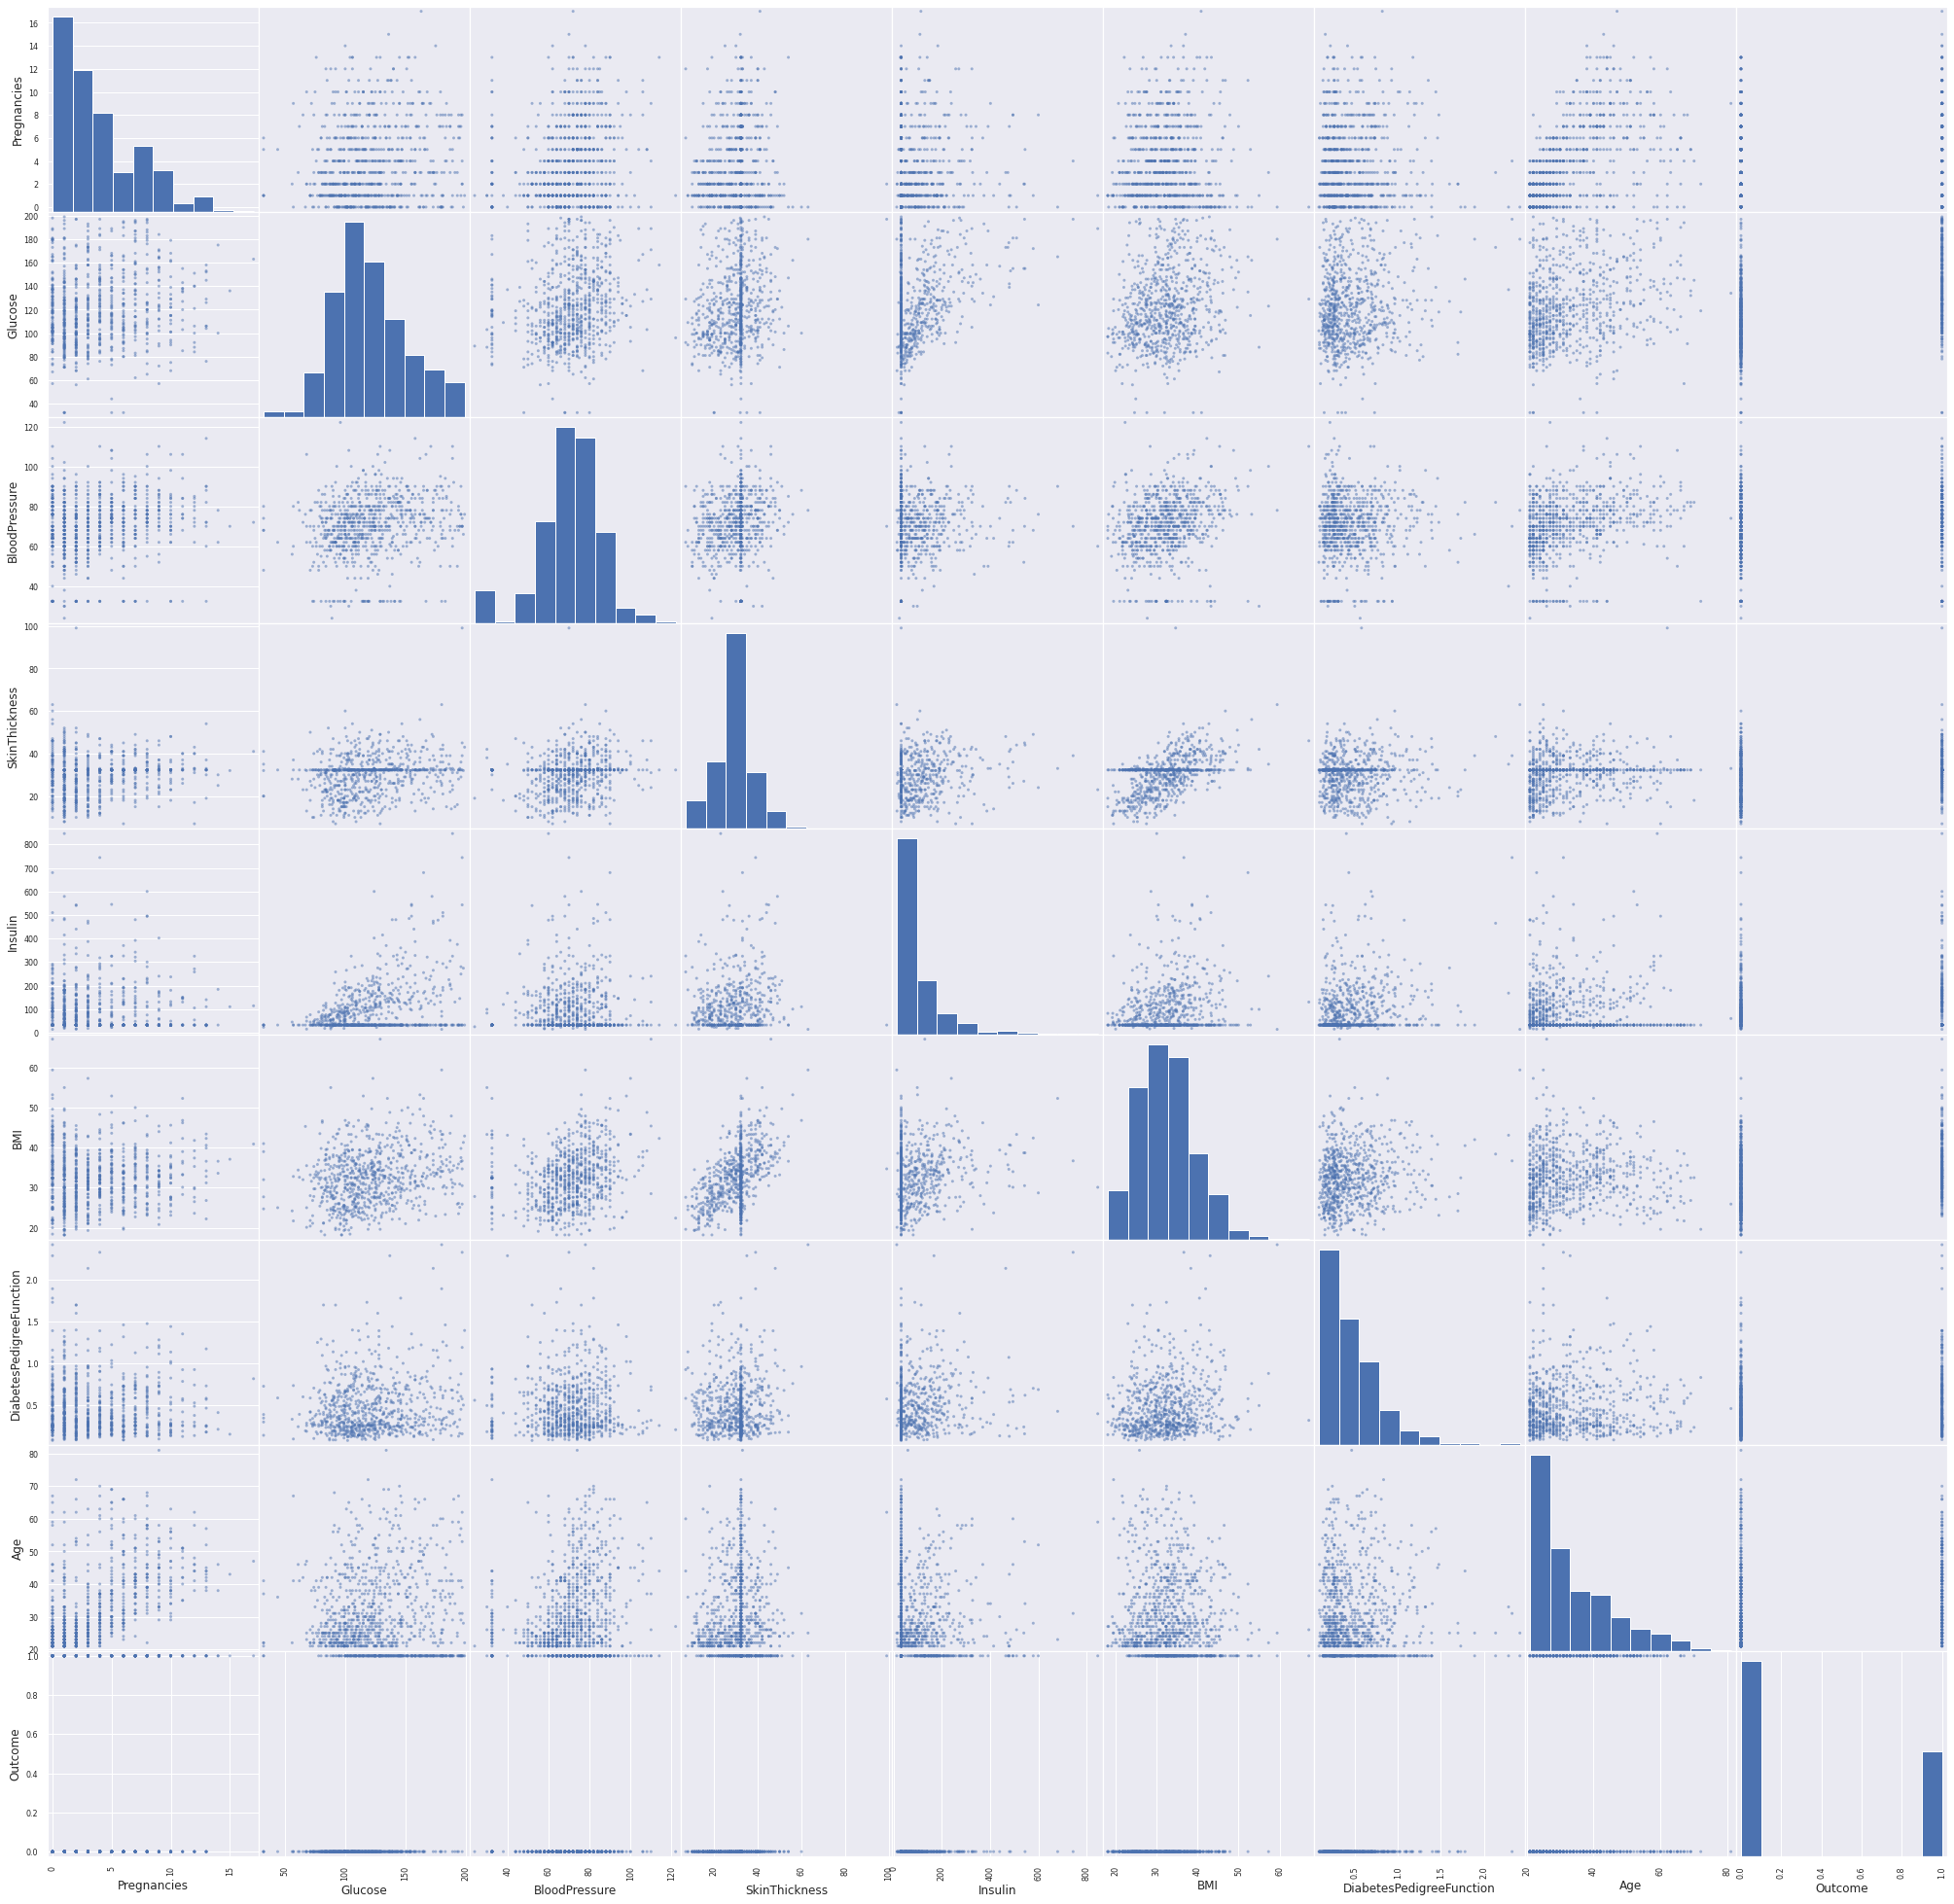

In [ ]:
from pandas.plotting import scatter_matrix
p=scatter_matrix(diabetes_data,figsize=(35, 35))

In [ ]:
#p=sns.pairplot(df, 'hue= 'Outcome')
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


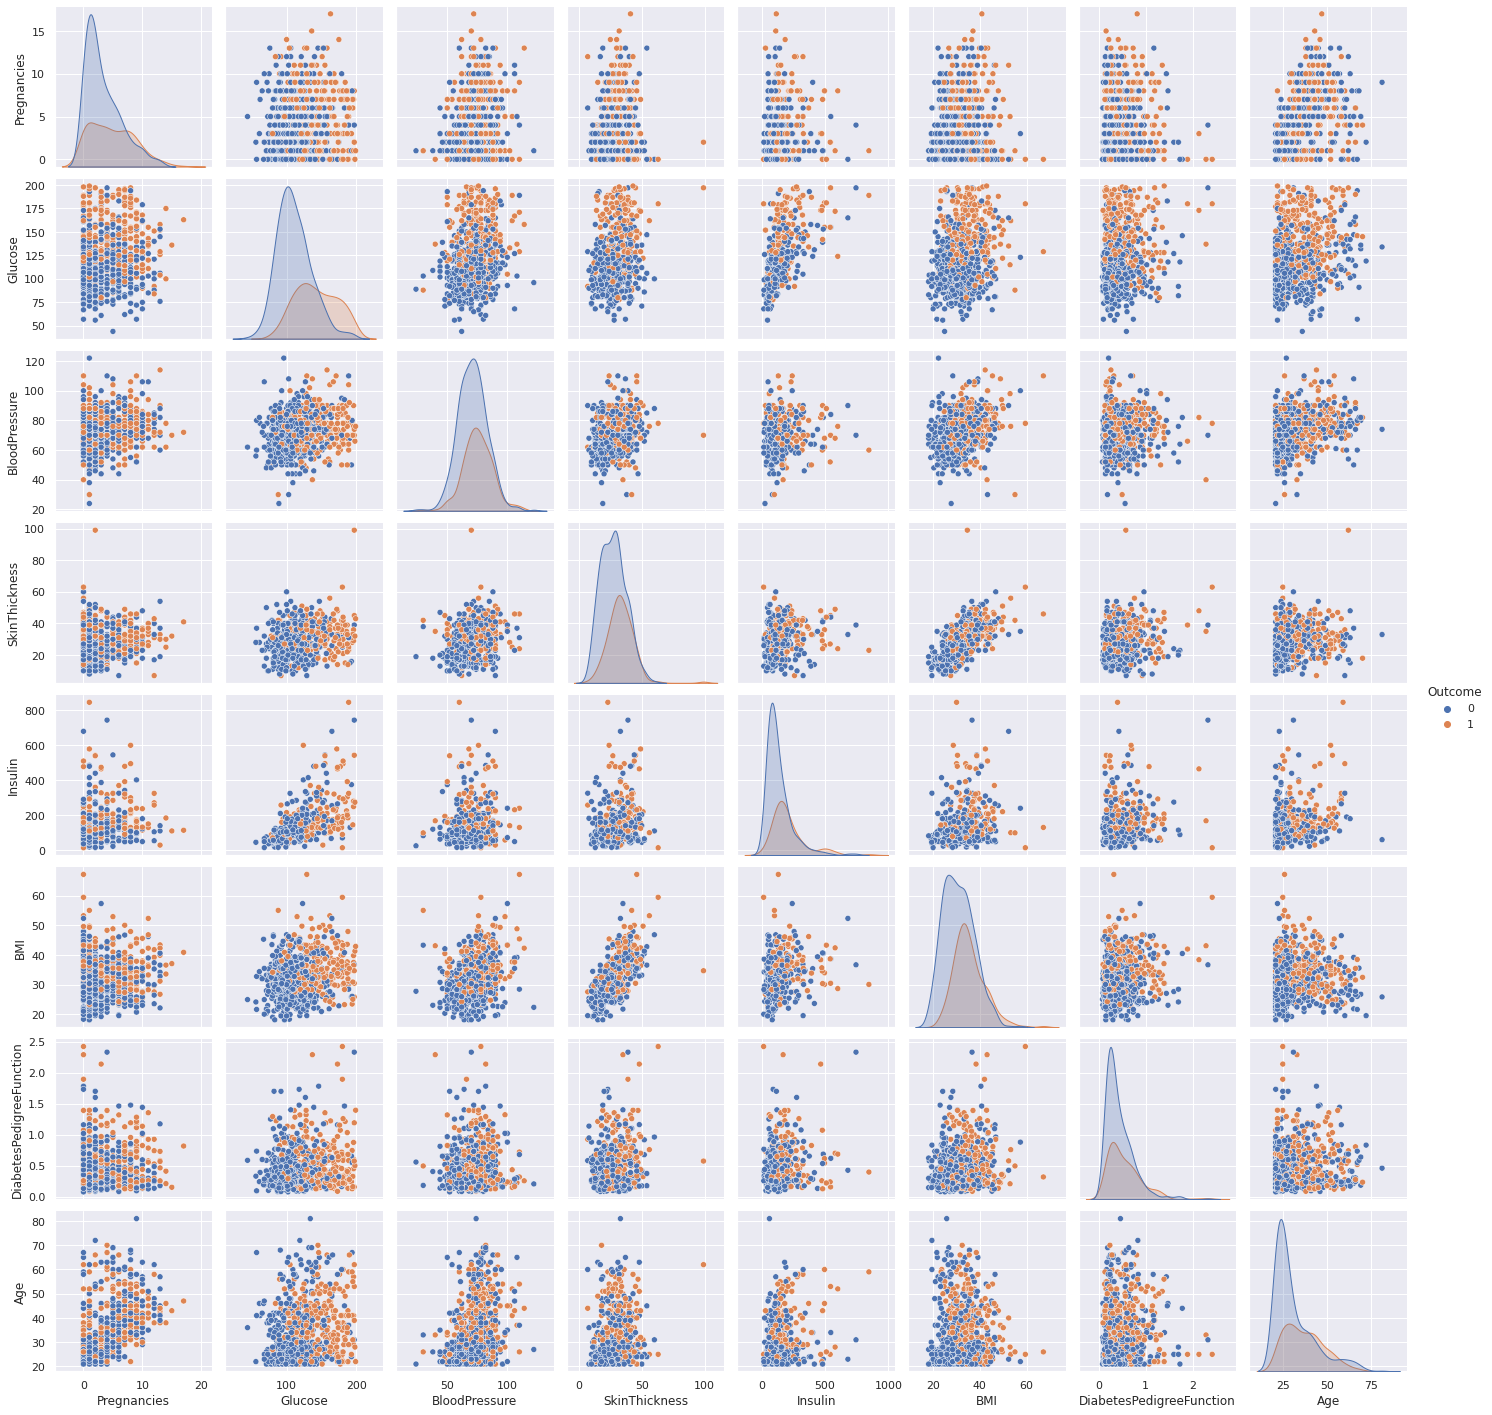

In [ ]:
p=sns.pairplot(diabetes_data_copy, hue = 'Outcome')

Let us check for outliers in the dataset and the graph is a boxplot

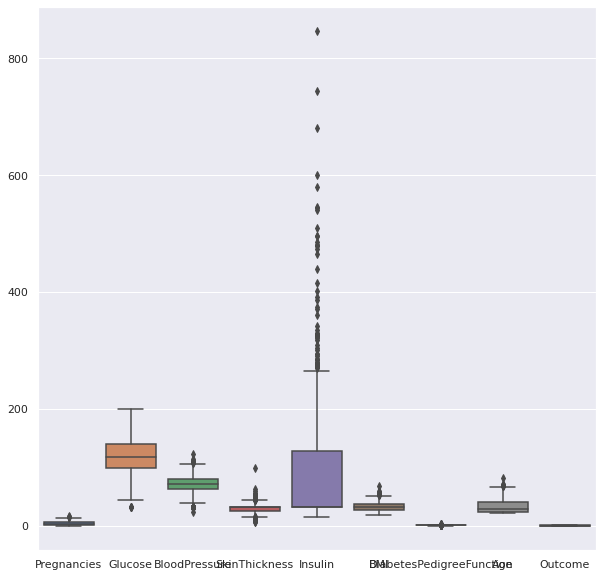

In [ ]:
#boxplot visualization

fig , ax = plt.subplots(figsize = (10,10))
sns.boxplot(data = diabetes_data, ax = ax)

There are multiple outliers in the 'Insulin' column of the dataset. These need to be handled

In [ ]:
#let us choose 70% as our quantile range and any datapoints above this range would be considered outliers

q= diabetes_data['Insulin'].quantile(0.75)
q

127.25

In [ ]:
#q= diabetes_data['Insulin'].quantile(0.7)
                                    
q

106.0

In [ ]:
#create dataframe to that eliminates the outliers

df_new = diabetes_data[diabetes_data['Insulin'] < q]
df_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,32.3,33.6,0.627,50,1
1,1,85.0,66.0,29.0,32.3,26.6,0.351,31,0
2,8,183.0,64.0,32.3,32.3,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
5,5,116.0,74.0,32.3,32.3,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,9,89.0,62.0,32.3,32.3,22.5,0.142,33,0
764,2,122.0,70.0,27.0,32.3,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,32.3,32.3,30.1,0.349,47,1


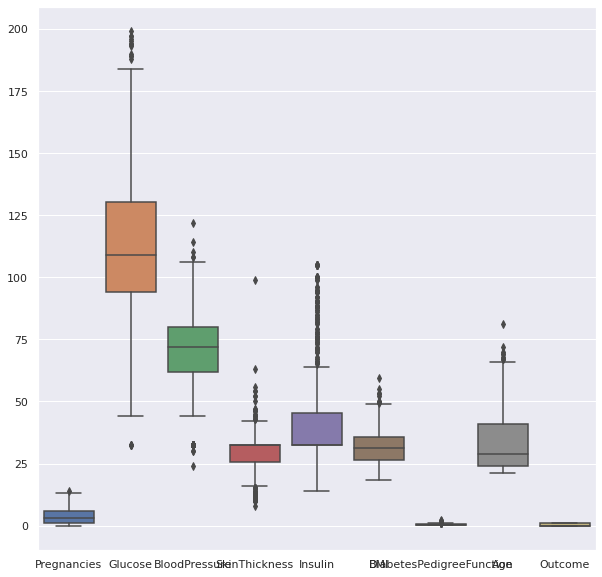

In [ ]:
#verifying with the boxplot

fig , ax = plt.subplots(figsize = (10,10))
sns.boxplot(data = df_new, ax = ax)

So far, we have handled only 'Insulin' column . Let us follow the same technique to handle the outliers in the other columns as well setting different quantile ranges as required

1. Handling 'Pregnancies' outliers

In [ ]:
#pregnancies -- small outliers
q = diabetes_data['Pregnancies'].quantile(0.97)  #selecting q range as 90%
df_new = df_new[df_new['Pregnancies'] < q]


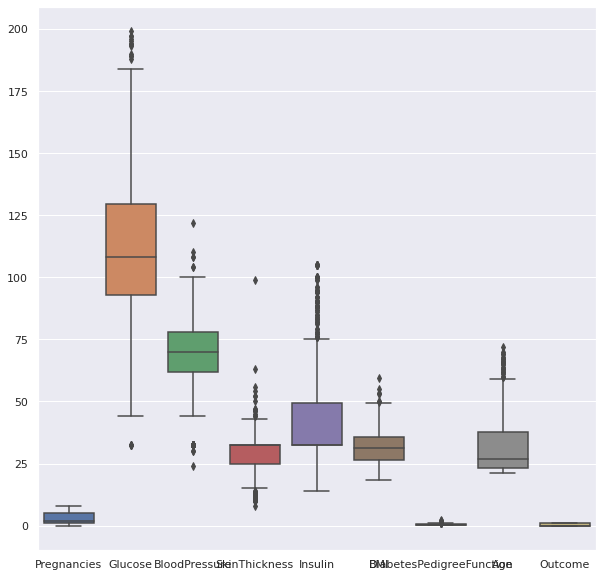

In [ ]:
#verifying with the boxplot

fig , ax = plt.subplots(figsize = (10,10))
sns.boxplot(data = df_new, ax = ax)

2. Handling 'BMI' outliers

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 552 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               552 non-null    int64  
 1   Glucose                   552 non-null    float64
 2   BloodPressure             552 non-null    float64
 3   SkinThickness             552 non-null    float64
 4   Insulin                   552 non-null    float64
 5   BMI                       552 non-null    float64
 6   DiabetesPedigreeFunction  552 non-null    float64
 7   Age                       552 non-null    int64  
 8   Outcome                   552 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 43.1 KB


In [ ]:
df_new


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,32.3,33.6,0.627,50,1
1,1,85.0,66.0,29.0,32.3,26.6,0.351,31,0
2,8,183.0,64.0,32.3,32.3,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
5,5,116.0,74.0,32.3,32.3,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
759,6,190.0,92.0,32.3,32.3,35.5,0.278,66,1
760,2,88.0,58.0,26.0,16.0,28.4,0.766,22,0
764,2,122.0,70.0,27.0,32.3,36.8,0.340,27,0
766,1,126.0,60.0,32.3,32.3,30.1,0.349,47,1


In [ ]:
#BMI outliers
q = diabetes_data['BMI'].quantile(0.99)  #selecting q range as 99%
df_new = df_new[df_new['BMI'] <q]

3. Handling 'SkinThickness' outliers

In [ ]:
#skinthickness outliers
q =  diabetes_data['SkinThickness'].quantile(0.99)  #selecting q range as 99%
df_new =  df_new[ df_new['SkinThickness'] < q]

4. Handling 'Insulin' outliers

In [ ]:
#insulin outliers
q = df_new['Insulin'].quantile(0.99)  #selecting q range as 95%
df_new = df_new[df_new['Insulin'] < q]

 Handling 'DiabetesPedigreeFunction' outliers

In [ ]:
#diabetes pedigree function outliers
q = diabetes_data['DiabetesPedigreeFunction'].quantile(0.99)  #selecting q range as 99%
df_new = df_new[df_new['DiabetesPedigreeFunction'] < q]

6. Handling 'Age' outliers

In [ ]:
#age
q = diabetes_data['Age'].quantile(0.99)  #selecting q range as 99%
df_new = df_new[df_new['Age'] <q]

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 522 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               522 non-null    int64  
 1   Glucose                   522 non-null    float64
 2   BloodPressure             522 non-null    float64
 3   SkinThickness             522 non-null    float64
 4   Insulin                   522 non-null    float64
 5   BMI                       522 non-null    float64
 6   DiabetesPedigreeFunction  522 non-null    float64
 7   Age                       522 non-null    int64  
 8   Outcome                   522 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 40.8 KB


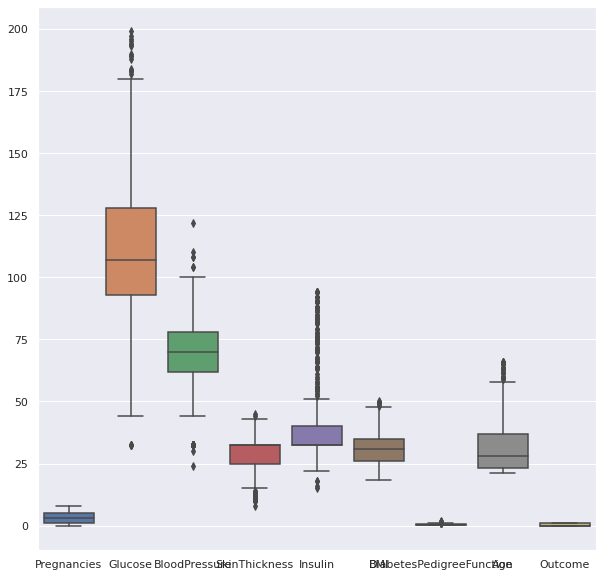

In [ ]:
#verifying with the boxplot

fig , ax = plt.subplots(figsize = (10,10))
sns.boxplot(data = df_new, ax = ax)

MULTICOLLINEARITY CHECK

Let us use Variance Inflation Factor (VIF) to check for multi collinearity among the features and eliminate the thos efeatures which are collinear since they wouldn't contribute much to the model building

IMPORTING LIBRARY

In [ ]:
#importing VIF from statsmodel library

from statsmodels.stats.outliers_influence import variance_inflation_factor

STANDARDIZATION

Importing StandardScaler from the sklearn library - Standardization is perfomed on the dataset so as to bring all the values in the dataset to the same range for an easier manipulation

In [ ]:
# scaling the data
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X1 =  pd.DataFrame(sc_X.fit_transform(diabetes_data.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [ ]:
# scaling the data
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(df_new.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [ ]:
#creating a dataframe vif

vif = pd.DataFrame()
#storing all the scaled feature values in the created dataframe 

vif["vif"] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif["features"] = x.columns
vif

In [ ]:
#X = diabetes_data.drop("Outcome",axis = 1)
y = df_new.Outcome  # assigning the label column

# TRAIN TEST SPLIT

In [ ]:
#importing train_test_split
from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

In [ ]:
#train test split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size= 0.20,random_state=0) 

LOGISTIC REGRESSION¶



IMPORTING LOGISTIC REGRESSION FROM SKLEARN LIBRAR

In [ ]:
#importing library


from sklearn.linear_model import LogisticRegression

MODEL BUILDING

In [ ]:
#creating a logistic regression model

logi = LogisticRegression(verbose=1,n_jobs=4,solver='liblinear')

FITTING THE MODEL

In [ ]:
#fitting the model

logi.fit(x_train,y_train)

[LibLinear]

LogisticRegression(n_jobs=4, solver='liblinear', verbose=1)

In [ ]:
#let us now predict for our test data

y_pred = logi.predict(x_test)

CONFUSION MATRIX

In [ ]:
#importing from sklearn library

from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve

In [ ]:
#confusion matrix

confusion_matrix(y_test,y_pred)

array([[58,  6],
       [10, 13]])

In [ ]:
tn,fp,fn,tp = confusion_matrix(y_test,y_pred).ravel()

In [ ]:
#accuracy of our model

accuracy = (tn+tp)/ (tp+tn+fp+tn)


accuracy 

0.5259259259259259

In [ ]:
#precison of our model

precision = tp/(tp+fn)
precision

0.5652173913043478

In [ ]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
#In case of classifier like knn the parameter to be tuned is n_neighbors
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
#knn = KNeighborsClassifier()
logi_cv= GridSearchCV(model,grid,cv=5)
logi_cv.fit(x_train, y_train)

print("Best Score:" + str(logi_cv.best_score_))
print("Best Parameters: " + str(logi_cv.best_params_))

Best Score:0.8138533674339301
Best Parameters: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


In [ ]:
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.795602 using {'metric': 'euclidean', 'n_neighbors': 13, 'weights': 'uniform'}
0.716975 (0.064759) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.716975 (0.064759) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.757647 (0.063174) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.757647 (0.063174) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.782997 (0.063968) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.775238 (0.067766) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.787843 (0.061342) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.785798 (0.064117) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.779104 (0.061732) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.779048 (0.062746) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.784986 

In [ ]:
model = GradientBoostingClassifier()
n_estimators = [10, 100, 1000]
learning_rate = [0.001, 0.01, 0.1]
subsample = [0.5, 0.7, 1.0]
max_depth = [3, 7, 9]
# define grid search
grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.798431 using {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 10, 'subsample': 1.0}
0.726891 (0.010292) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.5}
0.726891 (0.010292) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.7}
0.726891 (0.010292) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 1.0}
0.726891 (0.010292) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.5}
0.726891 (0.010292) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
0.726891 (0.010292) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
0.782969 (0.061804) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 0.5}
0.793613 (0.056376) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 0.7}
0.793613 (0.053035) with: {'learning_rate': 0.001, 'max

In [ ]:
# define models and parameters
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.793748 using {'max_features': 'log2', 'n_estimators': 1000}
0.781630 (0.061308) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.788947 (0.065726) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.787379 (0.058052) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.767383 (0.065897) with: {'max_features': 'log2', 'n_estimators': 10}
0.784127 (0.065874) with: {'max_features': 'log2', 'n_estimators': 100}
0.793748 (0.065576) with: {'max_features': 'log2', 'n_estimators': 1000}


In [ ]:
# define models and parameters
model = BaggingClassifier()
n_estimators = [10, 100, 1000]
# define grid search
grid = dict(n_estimators=n_estimators)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# define model and parameters
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

NameError: ignored

In [ ]:
''' import AutoML class from flaml package '''
from flaml import AutoML
automl = AutoML()
'''AutoGluon
EvalML
FLAML
H2O AutoML
LightAutoML
MLJAR
TPOT'''

In [ ]:
settings = {
    "time_budget": 240,  # total running time in seconds
    "metric": 'accuracy',  # can be: 'r2', 'rmse', 'mae', 'mse', 'accuracy', 'roc_auc', 'roc_auc_ovr',
                           # 'roc_auc_ovo', 'log_loss', 'mape', 'f1', 'ap', 'ndcg', 'micro_f1', 'macro_f1'
    "task": 'classification',  # task type
    "log_file_name": 'airlines_experiment.log',  # flaml log file
    "seed": 7654321,    # random seed
}

In [ ]:
'''The main flaml automl API'''
automl.fit(x_train, y_train, **settings)

[flaml.automl: 03-02 06:25:02] {2055} INFO - task = classification
[flaml.automl: 03-02 06:25:02] {2057} INFO - Data split method: stratified
[flaml.automl: 03-02 06:25:02] {2061} INFO - Evaluation method: cv
[flaml.automl: 03-02 06:25:02] {2142} INFO - Minimizing error metric: 1-accuracy
[flaml.automl: 03-02 06:25:02] {2200} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'catboost', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl: 03-02 06:25:02] {2453} INFO - iteration 0, current learner lgbm
[flaml.automl: 03-02 06:25:03] {2569} INFO - Estimated sufficient time budget=3930s. Estimated necessary time budget=96s.
[flaml.automl: 03-02 06:25:03] {2621} INFO -  at 0.5s,	estimator lgbm's best error=0.2950,	best estimator lgbm's best error=0.2950
[flaml.automl: 03-02 06:25:03] {2453} INFO - iteration 1, current learner lgbm
[flaml.automl: 03-02 06:25:03] {2621} INFO -  at 0.6s,	estimator lgbm's best error=0.2950,	best estimator lgbm's best error=0.2950
[flaml.aut

In [ ]:
'''retrieve best config and best learner'''
print('Best ML leaner:', automl.best_estimator)
print('Best hyperparmeter config:', automl.best_config)
print('Best accuracy on validation data: {0:.4g}'.format(1-automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))

Best ML leaner: xgboost
Best hyperparmeter config: {'n_estimators': 8, 'max_leaves': 5, 'min_child_weight': 0.006926980485371872, 'learning_rate': 0.001660769294189753, 'subsample': 1.0, 'colsample_bylevel': 0.8941594790438633, 'colsample_bytree': 0.9456872233455964, 'reg_alpha': 0.0009765625, 'reg_lambda': 2.4648100450482064}
Best accuracy on validation data: 0.8178
Training duration of best run: 0.02613 s


In [ ]:
automl.model.estimator

XGBClassifier(colsample_bylevel=0.8941594790438633,
              colsample_bytree=0.9456872233455964, grow_policy='lossguide',
              learning_rate=0.001660769294189753, max_depth=0, max_leaves=5,
              min_child_weight=0.006926980485371872, n_estimators=8, n_jobs=-1,
              reg_alpha=0.0009765625, reg_lambda=2.4648100450482064,
              subsample=1.0, tree_method='hist', use_label_encoder=False,
              verbosity=0)

In [ ]:
'''pickle and save the automl object'''
import pickle
with open('automlxg.pkl', 'wb') as f:
    pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)
'''load pickled automl object'''
with open('automlxg.pkl', 'rb') as f:
    automl = pickle.load(f)

In [ ]:
'''compute predictions of testing dataset''' 
y_pred = automl.predict(x_test)
print('Predicted labels', y_pred)
print('True labels', y_test)
y_pred_proba = automl.predict_proba(x_test)[:,1]


Predicted labels [0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0]
True labels 604    1
706    1
108    0
182    0
667    1
      ..
660    0
142    0
250    0
252    0
79     0
Name: Outcome, Length: 105, dtype: int64


In [ ]:
y_pred_proba 

array([0.499015  , 0.49613354, 0.4950526 , 0.49503064, 0.4981503 ,
       0.50238836, 0.4981503 , 0.5017432 , 0.49733034, 0.49733034,
       0.5001442 , 0.49807736, 0.5001442 , 0.49503064, 0.4973204 ,
       0.4973204 , 0.49503064, 0.49605784, 0.49570498, 0.4950526 ,
       0.49528012, 0.4950526 , 0.4950526 , 0.4950526 , 0.4950526 ,
       0.5027755 , 0.49503064, 0.49503064, 0.49708727, 0.4950526 ,
       0.4973204 , 0.49503064, 0.4950526 , 0.49970835, 0.49570498,
       0.5001442 , 0.4950526 , 0.4973204 , 0.4981503 , 0.49528012,
       0.49605784, 0.5000955 , 0.4981503 , 0.49528012, 0.49528012,
       0.5001442 , 0.49570498, 0.49605784, 0.49801266, 0.5005728 ,
       0.5001442 , 0.4950526 , 0.49528012, 0.5017432 , 0.4985036 ,
       0.49503064, 0.4950526 , 0.5005728 , 0.49528012, 0.49970835,
       0.49934545, 0.49503064, 0.49503064, 0.49605784, 0.49570498,
       0.4981503 , 0.4950526 , 0.4950526 , 0.4977216 , 0.5021303 ,
       0.49503064, 0.49528012, 0.49570498, 0.49807736, 0.49503

In [ ]:
''' compute different metric values on testing dataset'''
from flaml.ml import sklearn_metric_loss_score
print('accuracy', '=', 1 - sklearn_metric_loss_score('accuracy', y_pred, y_test))
print('roc_auc', '=', 1 - sklearn_metric_loss_score('roc_auc', y_pred_proba, y_test))
print('log_loss', '=', sklearn_metric_loss_score('log_loss', y_pred_proba, y_test))

accuracy = 0.7714285714285715
roc_auc = 0.7769999999999999
log_loss = 0.688591000011989


In [ ]:
settings = {
    "time_budget": 240,  # total running time in seconds
    "metric": 'accuracy',  # can be: 'r2', 'rmse', 'mae', 'mse', 'accuracy', 'roc_auc', 'roc_auc_ovr',
                           # 'roc_auc_ovo', 'log_loss', 'mape', 'f1', 'ap', 'ndcg', 'micro_f1', 'macro_f1'
    "task": 'regression',  # task type
    "log_file_name": 'airlines_experiment.log',  # flaml log file
    "seed": 7654321,    # random seed

In [ ]:
'''The main flaml automl API'''
automl.fit(x_train, y_train, **settings)

[flaml.automl: 03-02 04:49:02] {2055} INFO - task = classification
[flaml.automl: 03-02 04:49:02] {2057} INFO - Data split method: stratified
[flaml.automl: 03-02 04:49:02] {2061} INFO - Evaluation method: cv
[flaml.automl: 03-02 04:49:02] {2142} INFO - Minimizing error metric: 1-accuracy
[flaml.automl: 03-02 04:49:02] {2200} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'catboost', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl: 03-02 04:49:02] {2453} INFO - iteration 0, current learner lgbm
[flaml.automl: 03-02 04:49:02] {2569} INFO - Estimated sufficient time budget=575s. Estimated necessary time budget=14s.
[flaml.automl: 03-02 04:49:02] {2621} INFO -  at 0.1s,	estimator lgbm's best error=0.2732,	best estimator lgbm's best error=0.2732
[flaml.automl: 03-02 04:49:02] {2453} INFO - iteration 1, current learner lgbm
[flaml.automl: 03-02 04:49:02] {2621} INFO -  at 0.2s,	estimator lgbm's best error=0.2732,	best estimator lgbm's best error=0.2732
[flaml.auto

In [ ]:
'''retrieve best config and best learner'''
print('Best ML leaner:', automl.best_estimator)
print('Best hyperparmeter config:', automl.best_config)
print('Best accuracy on validation data: {0:.4g}'.format(1-automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))

Best ML leaner: lgbm
Best hyperparmeter config: {'n_estimators': 11, 'num_leaves': 4, 'min_child_samples': 20, 'learning_rate': 0.4881631715976192, 'log_max_bin': 8, 'colsample_bytree': 0.595520783764583, 'reg_alpha': 0.03807459034428667, 'reg_lambda': 0.005248561196457515}
Best accuracy on validation data: 0.8286
Training duration of best run: 0.01809 s


NameError: ignored

In [ ]:
classification_report(y_test,y_pred)